In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
data=nc.Dataset('/ihesp/archive/Sunway_Runs/LR_PI_CTRL/B.E.13.B1850C5.ne30g16.sehires38.003.sunway.pop.h.HMXL.000101.050012.nc')

In [3]:
plotvar = data.variables['HMXL'][4808,:,:]
#plotvar = data.variables['HMXL'][5408,:,:]
#plotvar = data.variables['HMXL'][4208,:,:]

In [4]:
8+12*350

4208

In [5]:
        lontu = data.variables['TLONG'][:,:]
        lattu = data.variables['TLAT'][:,:]

In [6]:
lont2 = lontu[17:,44]
latt2 = lattu[17:,44]

In [7]:
plotvarone = plotvar[:,0]
lontone = lontu[:,0]
lattone = lattu[:,0]

In [8]:
plot = np.ones([384,321])
ln = np.ones([384,321])
lt = np.ones([384,321])

In [9]:
plot[:,:320]=plotvar
plot[:,320]=plotvarone
ln[:,:320]=lontu
ln[:,320]=lontone
lt[:,:320]=lattu
lt[:,320]=lattone

In [10]:
np.nanmax(plot)

9.969209968386869e+36

In [11]:
plot

array([[9.96920997e+36, 9.96920997e+36, 9.96920997e+36, ...,
        9.96920997e+36, 9.96920997e+36, 9.96920997e+36],
       [9.96920997e+36, 9.96920997e+36, 9.96920997e+36, ...,
        9.96920997e+36, 9.96920997e+36, 9.96920997e+36],
       [1.88182832e+04, 1.92916562e+04, 1.88682930e+04, ...,
        9.96920997e+36, 9.96920997e+36, 1.88182832e+04],
       ...,
       [9.96920997e+36, 9.96920997e+36, 9.96920997e+36, ...,
        9.96920997e+36, 9.96920997e+36, 9.96920997e+36],
       [9.96920997e+36, 9.96920997e+36, 9.96920997e+36, ...,
        9.96920997e+36, 9.96920997e+36, 9.96920997e+36],
       [9.96920997e+36, 9.96920997e+36, 9.96920997e+36, ...,
        9.96920997e+36, 9.96920997e+36, 9.96920997e+36]])

In [12]:
    #plot[plot == -1] = np.nan
    #plot[plot > 100000000] = np.nan

In [13]:
nice_cmap=plt.get_cmap('jet')
lev_cmap = nice_cmap([10,20,30,40,50,60,70,80,90,100,110,120,140,150,160,170,180,190,200,210,220,230,240,290,300])
#lev_cmap = nice_cmap([300,290,240,230,220,210,200,190,180,170,160,150,140,120,110,100,90,80,70,60,50,40,30,20,10])
new_cmap = cols.ListedColormap(lev_cmap,"jet")
nice_levels = [-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
nice_levels = [40,60,80,100,120,140,160,180,200,220]
#nice_levels = [-220,-200,-180,-160,-140,-120,-100,-80,-60,-40]
#levels = [220,-60]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


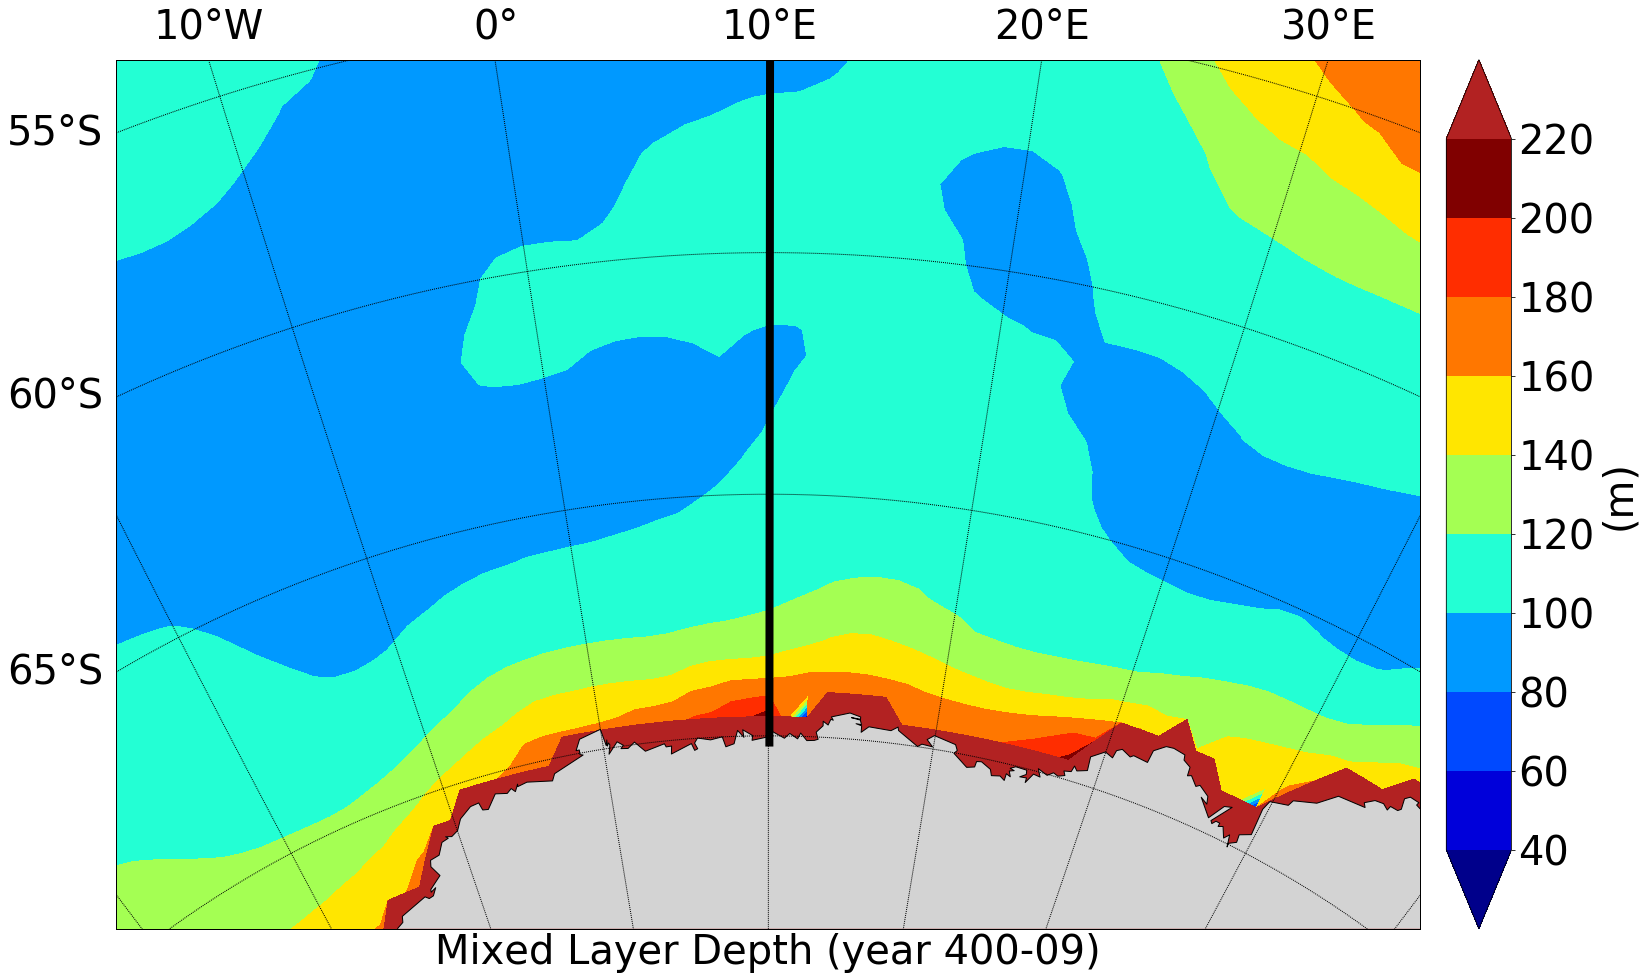

In [14]:
        plt.figure(figsize=(25,20))
        my_font = {'fontname':'Cambria', 'size':'40'}

        map = Basemap(projection='aeqd', lat_0 = -65, lon_0 = 10,area_thresh = 100,\
                     width = 3000000,height = 2000000,resolution ='l') 
        map.drawcoastlines()
        map.fillcontinents(color = 'lightgrey')
        map.drawmapboundary(color='black')
 
        map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
        map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)
       
        xq,yq=map(ln,lt)
        x2,y2=map(lont2,latt2)
        map.plot(x2,y2,'black',linewidth=8)
        CP = map.contourf(xq,yq,plot/100,cmap = new_cmap,levels = nice_levels,extend='both')
        CP.cmap.set_under('darkblue')
        CP.cmap.set_over('firebrick')
        
        cbar =map.colorbar(CP,extend='both',extendfrac='auto',ticks= nice_levels)
      
        cbar.ax.tick_params(labelsize=40) 
        cbar.set_label('(m)', **my_font)
        plt.xlabel('Mixed Layer Depth (year 400-09)',**my_font)
        plt.savefig("MLD1.png",bbox_inches='tight')

In [15]:
plot[plot > 100000000] = np.nan

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


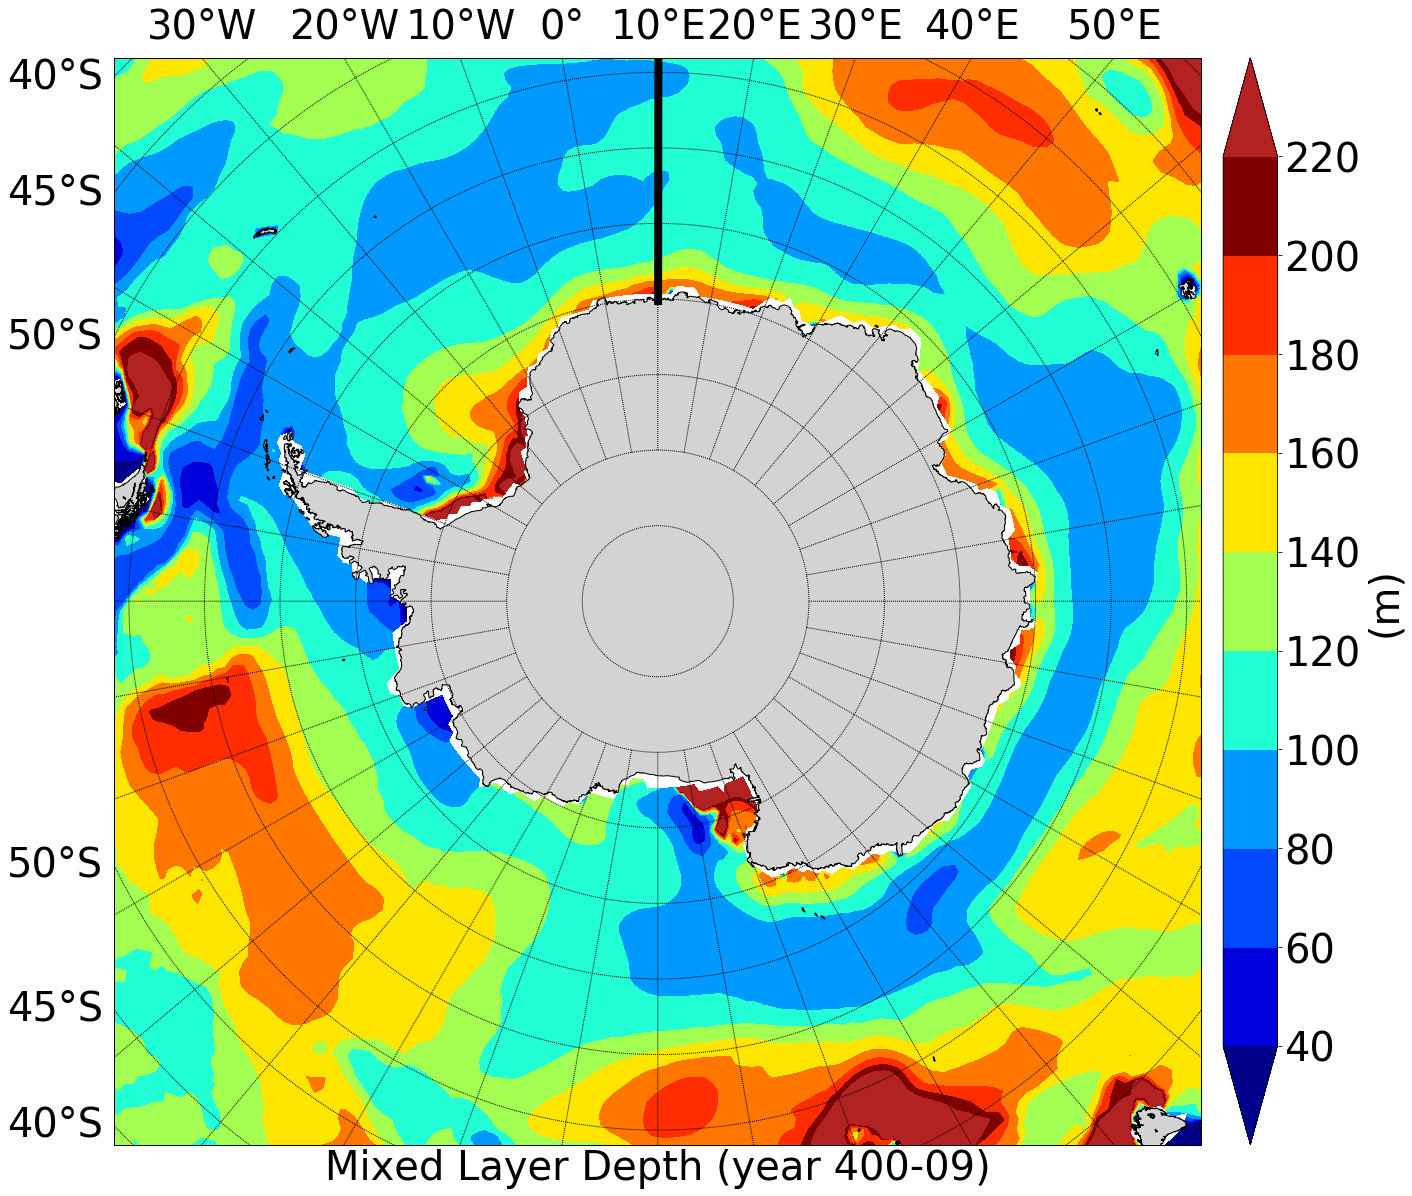

In [16]:
        plt.figure(figsize=(25,20))
        my_font = {'fontname':'Cambria', 'size':'40'}

        map = Basemap(projection='aeqd', lat_0 = -90, lon_0 = 10,area_thresh = 100,\
                     width = 8000000,height = 8000000,resolution ='h') 
        map.drawcoastlines()
        map.fillcontinents(color = 'lightgrey')
        map.drawmapboundary(color='black')
 
        map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
        map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)
       
        xq,yq=map(ln,lt)
        x2,y2=map(lont2,latt2)
        map.plot(x2,y2,'black',linewidth=8)
        CP = map.contourf(xq,yq,plot/100,cmap = new_cmap,levels = nice_levels,extend='both')
        
        CP.cmap.set_under('darkblue')
        CP.cmap.set_over('firebrick')
        cbar =map.colorbar(CP,extend='both',extendfrac='auto',ticks= nice_levels)
      
        cbar.ax.tick_params(labelsize=40) 
        cbar.set_label('(m)', **my_font)
        plt.xlabel('Mixed Layer Depth (year 400-09)',**my_font)
        plt.savefig("MLD2.png",bbox_inches='tight')